# Importing Libraries

In [1]:
# Standard imports for data manipulation
import numpy as np
import pandas as pd
import seaborn as sns

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Statistical analysis
import statsmodels.api as sm
import math

# Machine learning utilities
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Cleaning utilities
from ast import literal_eval
from subprocess import check_output

# Set up inline plotting for Jupyter Notebooks
%matplotlib inline

from scipy.stats import chi2_contingency
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression



# Importing Data

In [2]:
data = pd.read_csv('./LeagueofLegends.csv')
data.head()

,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,golddiff,...,redMiddleChamp,goldredMiddle,redADC,redADCChamp,goldredADC,redSupport,redSupportChamp,goldredSupport,redBans,Address
0,NALCS,2015,Spring,Season,TSM,1,0,C9,40,"[0, 0, -14, -65, -268, -431, -488, -789, -494,...",...,Fizz,"[475, 475, 552, 842, 1178, 1378, 1635, 1949, 2...",Sneaky,Sivir,"[475, 475, 532, 762, 1097, 1469, 1726, 2112, 2...",LemonNation,Thresh,"[515, 515, 577, 722, 911, 1042, 1194, 1370, 14...","['Tristana', 'Leblanc', 'Nidalee']",http://matchhistory.na.leagueoflegends.com/en/...
1,NALCS,2015,Spring,Season,CST,0,1,DIG,38,"[0, 0, -26, -18, 147, 237, -152, 18, 88, -242,...",...,Azir,"[475, 475, 552, 786, 1097, 1389, 1660, 1955, 2...",CoreJJ,Corki,"[475, 475, 532, 868, 1220, 1445, 1732, 1979, 2...",KiWiKiD,Annie,"[515, 515, 583, 752, 900, 1066, 1236, 1417, 15...","['RekSai', 'Janna', 'Leblanc']",http://matchhistory.na.leagueoflegends.com/en/...
2,NALCS,2015,Spring,Season,WFX,1,0,GV,40,"[0, 0, 10, -60, 34, 37, 589, 1064, 1258, 913, ...",...,Azir,"[475, 475, 533, 801, 1006, 1233, 1385, 1720, 1...",Cop,Corki,"[475, 475, 533, 781, 1085, 1398, 1782, 1957, 2...",BunnyFuFuu,Janna,"[515, 515, 584, 721, 858, 1002, 1168, 1303, 14...","['Leblanc', 'Zed', 'RekSai']",http://matchhistory.na.leagueoflegends.com/en/...
3,NALCS,2015,Spring,Season,TIP,0,1,TL,41,"[0, 0, -15, 25, 228, -6, -243, 175, -346, 16, ...",...,Lulu,"[475, 475, 532, 771, 1046, 1288, 1534, 1776, 2...",KEITH,KogMaw,"[475, 475, 532, 766, 1161, 1438, 1776, 1936, 2...",Xpecial,Janna,"[515, 515, 583, 721, 870, 1059, 1205, 1342, 15...","['RekSai', 'Rumble', 'LeeSin']",http://matchhistory.na.leagueoflegends.com/en/...
4,NALCS,2015,Spring,Season,CLG,1,0,T8,35,"[40, 40, 44, -36, 113, 158, -121, -191, 23, 20...",...,Lulu,"[475, 475, 532, 807, 1042, 1338, 1646, 1951, 2...",Maplestreet8,Corki,"[475, 475, 532, 792, 1187, 1488, 1832, 2136, 2...",Dodo8,Annie,"[475, 475, 538, 671, 817, 948, 1104, 1240, 136...","['Rumble', 'Sivir', 'Rengar']",http://matchhistory.na.leagueoflegends.com/en/...


# Cleaning Data

In [3]:
data.dtypes

League              object
Year                 int64
Season              object
Type                object
blueTeamTag         object
bResult              int64
rResult              int64
redTeamTag          object
gamelength           int64
golddiff            object
goldblue            object
bKills              object
bTowers             object
bInhibs             object
bDragons            object
bBarons             object
bHeralds            object
goldred             object
rKills              object
rTowers             object
rInhibs             object
rDragons            object
rBarons             object
rHeralds            object
blueTop             object
blueTopChamp        object
goldblueTop         object
blueJungle          object
blueJungleChamp     object
goldblueJungle      object
blueMiddle          object
blueMiddleChamp     object
goldblueMiddle      object
blueADC             object
blueADCChamp        object
goldblueADC         object
blueSupport         object
b

In [4]:
# Check for missing values
print("Missing values per column:")
missing_data = data.isnull().sum()
print(missing_data[missing_data > 0])

# Fill missing values for specified columns with 'Unknown'
columns_to_fill = ['blueTop', 'blueJungle', 'blueMiddle', 'blueADC', 'blueSupport',
                   'redTop', 'redJungle', 'redMiddle', 'redADC', 'redSupport']

fill_values = {col: 'Unknown' for col in columns_to_fill}
data.fillna(fill_values, inplace=True)

# Check again for missing values to confirm the changes
missing_data_after = data[columns_to_fill].isnull().sum()
missing_data_after

Missing values per column:
blueTeamTag    38
redTeamTag     37
blueTop        37
blueJungle     28
blueMiddle     37
blueADC        37
blueSupport    37
redTop         37
redJungle      24
redMiddle      37
redADC         37
redSupport     37
dtype: int64


blueTop        0
blueJungle     0
blueMiddle     0
blueADC        0
blueSupport    0
redTop         0
redJungle      0
redMiddle      0
redADC         0
redSupport     0
dtype: int64

In [5]:
blue_columns = ['goldblue', 'bKills', 'bTowers', 'bInhibs', 'bDragons', 'bBarons', 'bHeralds']
red_columns = ['goldred', 'rKills', 'rTowers', 'rInhibs', 'rDragons', 'rBarons', 'rHeralds']

# Apply 'literal_eval' to each column in the blue team list
for col in blue_columns:
    data[col] = data[col].apply(literal_eval)

# Apply 'literal_eval' to each column in the red team list
for col in red_columns:
    data[col] = data[col].apply(literal_eval)
    

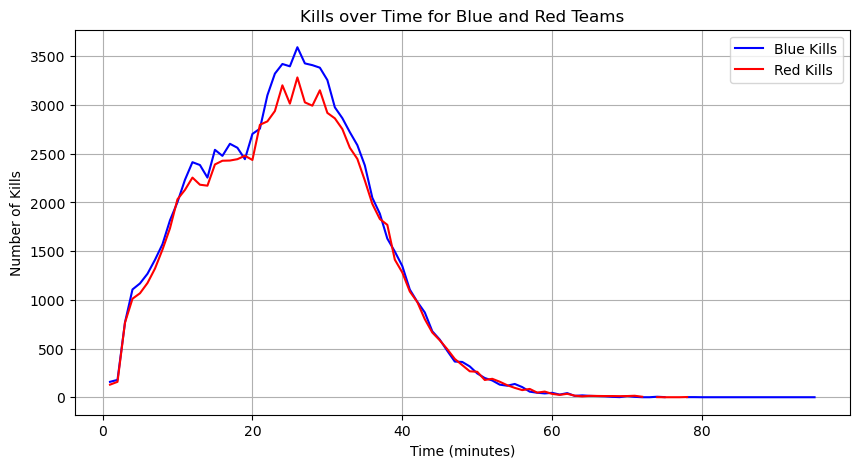

Peak Blue Kills: 3593.0 at 26.0 minutes
Peak Red Kills: 3283.0 at 26.0 minutes


In [6]:
# Loading the kills data from CSV and rounding the 'Time' column
kills_csv = pd.read_csv("./kills.csv")
kills_csv = kills_csv.round({'Time': 0})

# Filtering data for blue and red team kills
blue_kills = kills_csv[kills_csv.Team == 'bKills']
red_kills = kills_csv[kills_csv.Team == 'rKills']

# Ensuring the 'Time' column has no null values
blue_kills = blue_kills[blue_kills.Time.notnull()]
red_kills = red_kills[red_kills.Time.notnull()]

# Grouping kills by 'Time' and counting occurrences
blue_kills = blue_kills.groupby("Time").size()
red_kills = red_kills.groupby("Time").size()

# Creating a DataFrame to hold the kill data
kills_data = pd.DataFrame({"Blue Kills": blue_kills, "Red Kills": red_kills})

# Plotting the data
plt.figure(figsize=(10, 5))
plt.plot(kills_data.index, kills_data['Blue Kills'], color='blue', label='Blue Kills')
plt.plot(kills_data.index, kills_data['Red Kills'], color='red', label='Red Kills')
plt.title('Kills over Time for Blue and Red Teams')
plt.xlabel('Time (minutes)')
plt.ylabel('Number of Kills')
plt.legend()
plt.grid(True)
plt.show()

# Finding peak values and their corresponding times
peak_blue_kills = kills_data['Blue Kills'].max()
peak_red_kills = kills_data['Red Kills'].max()
peak_time_blue_kills = kills_data['Blue Kills'].idxmax()
peak_time_red_kills = kills_data['Red Kills'].idxmax()

print(f"Peak Blue Kills: {peak_blue_kills} at {peak_time_blue_kills} minutes")
print(f"Peak Red Kills: {peak_red_kills} at {peak_time_red_kills} minutes")

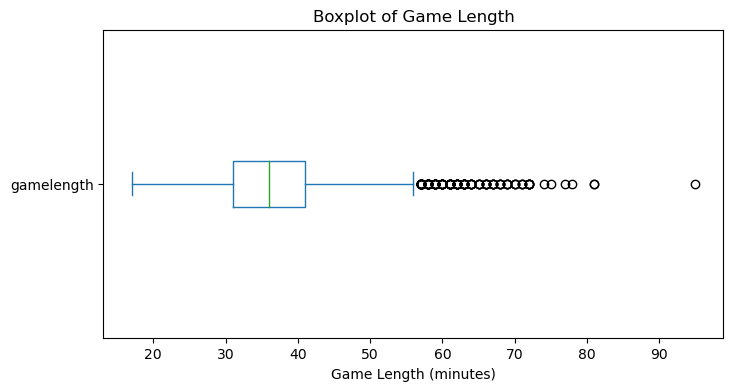

16

In [7]:
# Check for outliers in the 'gamelength' by visualizing with a boxplot
plt.figure(figsize=(8, 4))
data['gamelength'].plot(kind='box', vert=False)
plt.title('Boxplot of Game Length')
plt.xlabel('Game Length (minutes)')
plt.show()

# Count of games with more than 70 minutes
long_games = data[data['gamelength'] > 70]
count_long_games = long_games.shape[0]
count_long_games

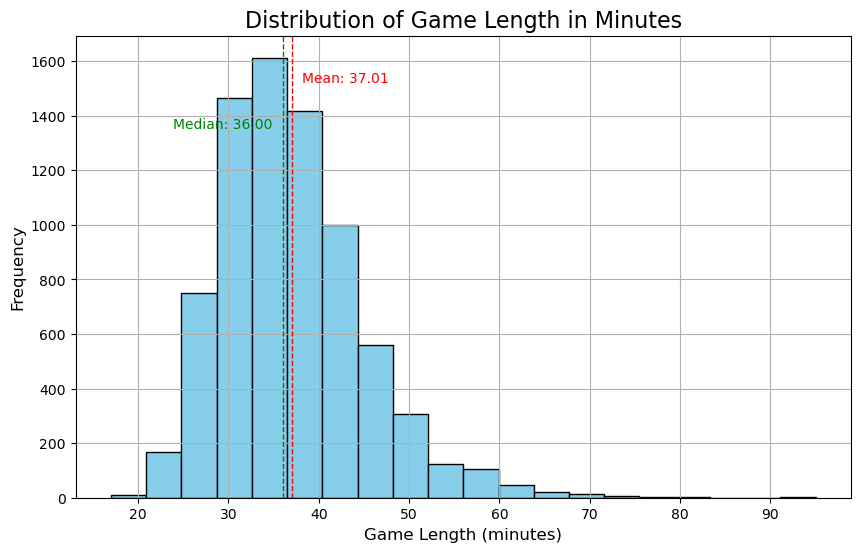

(34, 37.01259842519685)

In [8]:
plt.figure(figsize=(10, 6))
data['gamelength'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Game Length in Minutes', fontsize=16)
plt.xlabel('Game Length (minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.axvline(data['gamelength'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(data['gamelength'].median(), color='green', linestyle='dashed', linewidth=1)

# Show average and median on plot
min_ylim, max_ylim = plt.ylim()
plt.text(data['gamelength'].mean()*1.03, max_ylim*0.9, 'Mean: {:.2f}'.format(data['gamelength'].mean()), color='red')
plt.text(data['gamelength'].median()*0.97, max_ylim*0.8, 'Median: {:.2f}'.format(data['gamelength'].median()), ha='right', color='green')

plt.show()

# Calculate peak game length and average game length
peak_timing = data['gamelength'].mode()[0]
average_time = data['gamelength'].mean()

peak_timing, average_time


In [9]:
# Filter data directly
data = data[data['gamelength'] > 31]

# Define the cutoff time
cutoff_mins = 30

def objectives_before(column, length):
    """Retrieve objectives obtained before a defined time from the list of lists in the dataset."""
    # Transform entire column at once instead of converting to list in each call
    return column.apply(lambda game: [obj for obj in game if obj[0] < length])

# Objective columns to process
objective_columns = [
    'bKills', 'rKills', 'bTowers', 'rTowers',
    'bInhibs', 'rInhibs', 'bDragons', 'rDragons',
    'bBarons', 'rBarons', 'bHeralds', 'rHeralds'
]

# Apply the function to relevant columns and store results in new columns
for column in objective_columns:
    data[f'{column}_before'] = objectives_before(data[column], cutoff_mins)

# Convert lists to counts of objectives in a vectorized manner
for column in objective_columns:
    data[f'{column}_count'] = data[f'{column}_before'].apply(len)

# Extract additional columns and process gold values
data['blue_end_gold'] = data['goldblue'].apply(lambda x: x[cutoff_mins-1])
data['red_end_gold'] = data['goldred'].apply(lambda x: x[cutoff_mins-1])

# Generate binary win column using numpy for faster array comparison
data['winner'] = np.where(data['bResult'] == 1, 1, 0)

# Define columns of interest for display
columns_of_interest = [
    'blueTeamTag', 'bResult', 'bKills_count', 'bTowers_count', 'bInhibs_count',
    'bDragons_count', 'bHeralds_count', 'redTeamTag', 'rResult', 'rKills_count',
    'rTowers_count', 'rInhibs_count', 'rDragons_count', 'rHeralds_count', 'winner'
]

data.to_csv('./test.csv')

# Explantaory Data Analsyis

In [10]:
# Display summary statistics
print("Summary Statistics:")
print(data.describe())

Summary Statistics:
              Year      bResult      rResult   gamelength  bKills_count  \
count  5622.000000  5622.000000  5622.000000  5622.000000   5622.000000   
mean   2016.244931     0.526503     0.473497    40.134472      7.856813   
std       0.861079     0.499342     0.499342     6.863478      4.509330   
min    2014.000000     0.000000     0.000000    32.000000      0.000000   
25%    2016.000000     0.000000     0.000000    35.000000      5.000000   
50%    2016.000000     1.000000     0.000000    39.000000      7.000000   
75%    2017.000000     1.000000     1.000000    43.000000     10.000000   
max    2018.000000     1.000000     1.000000    95.000000     55.000000   

       rKills_count  bTowers_count  rTowers_count  bInhibs_count  \
count   5622.000000    5622.000000    5622.000000    5622.000000   
mean       7.757737       3.896834       3.569548       0.171647   
std        4.568287       1.937751       1.953667       0.489229   
min        0.000000       0.0000

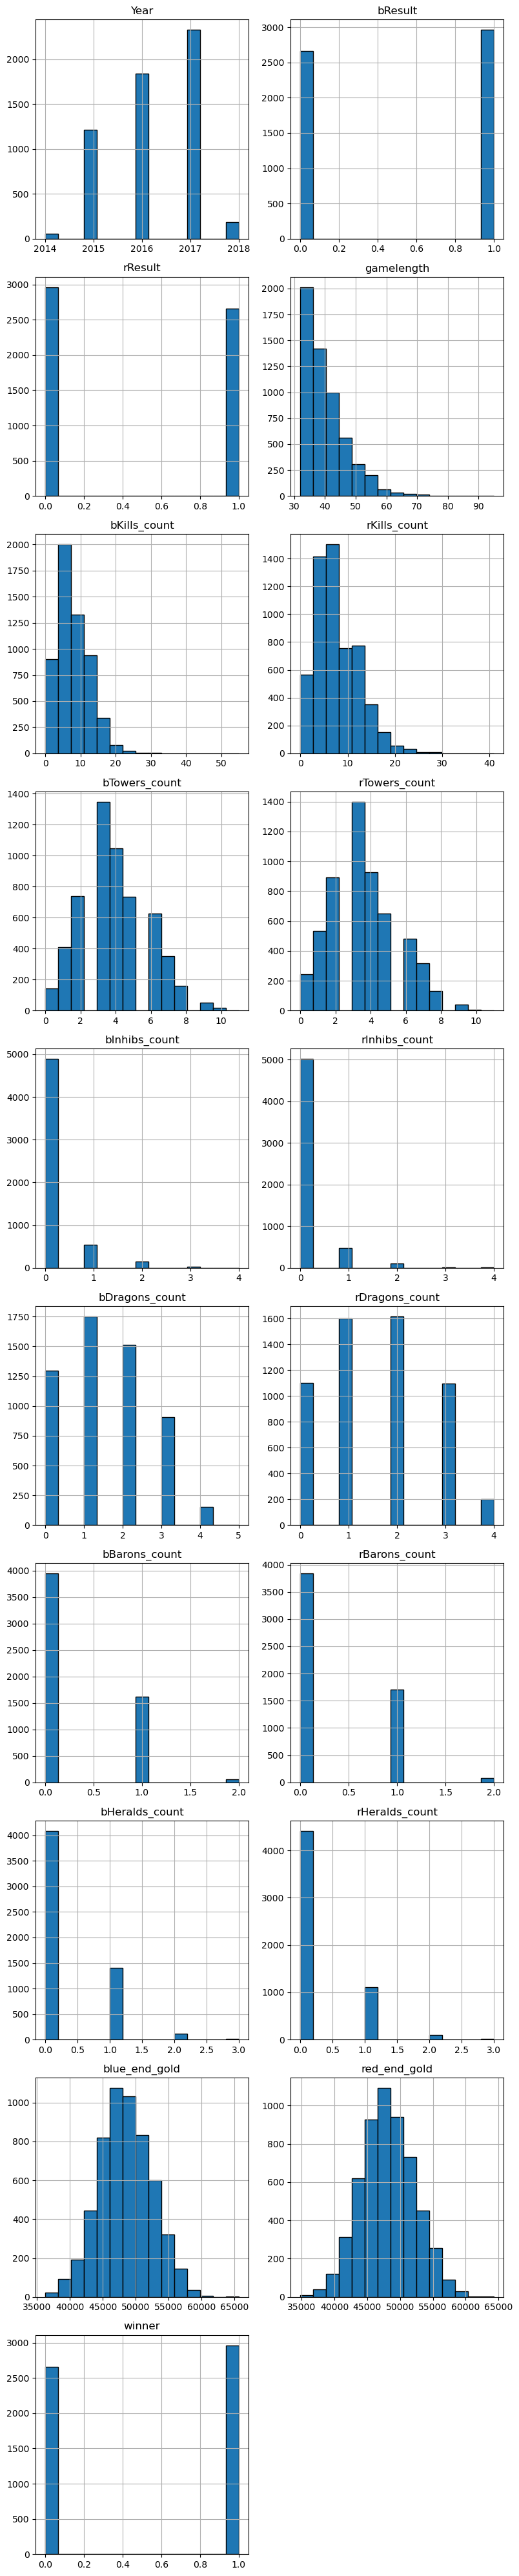

In [11]:
# Select numeric columns from the DataFrame
numeric_cols = data.select_dtypes(include=[np.number]).columns
num_plots = len(numeric_cols)

# Define the number of columns for the subplot grid
cols = 2
# Calculate the required number of rows to accommodate the plots
rows = (num_plots + cols - 1) // cols

# Plot the histograms
data[numeric_cols].hist(bins=15, figsize=(8, rows * 4), layout=(rows, cols), edgecolor='black')
plt.tight_layout()
plt.show()

Cross-tabulation for League:
bResult    0    1
League           
CBLoL    110  135
CLS       59   62
EULCS    402  427
IEM       43   50
LCK      547  618
LCL      101  103
LJL       87   99
LLN       72   81
LMS      279  289
MSI       32   42
NALCS    447  499
OPL      144  136
RR        39   35
TCL      206  255
WC        94  129

Chi-Square Test for League:
Chi2 Statistic: 9.31889779350974, p-value: 0.8100955284426551



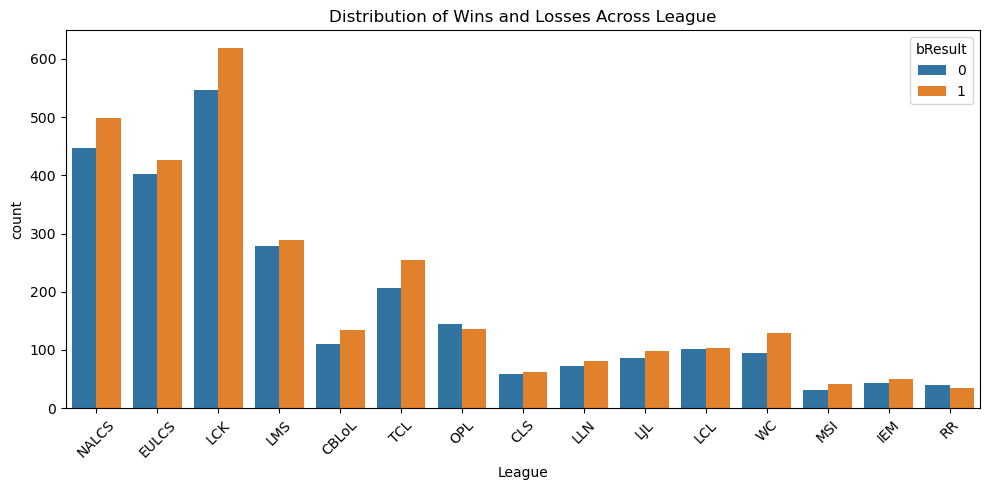

Cross-tabulation for Season:
bResult     0     1
Season             
Spring   1211  1370
Summer   1451  1590

Chi-Square Test for Season:
Chi2 Statistic: 0.322572450525212, p-value: 0.570065782216636



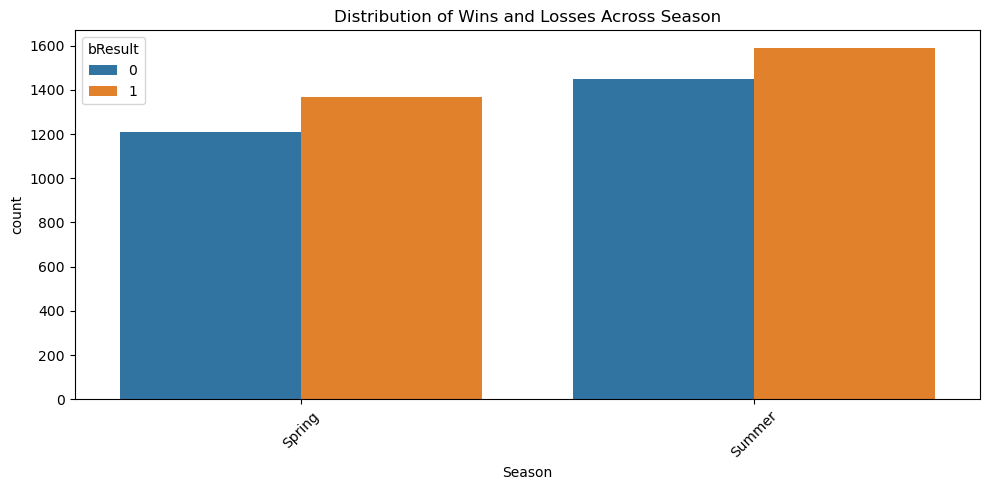

Cross-tabulation for Year:
bResult     0     1
Year               
2014       21    34
2015      573   639
2016      904   939
2017     1079  1246
2018       85   102

Chi-Square Test for Year:
Chi2 Statistic: 5.090687998690839, p-value: 0.27811827498809766



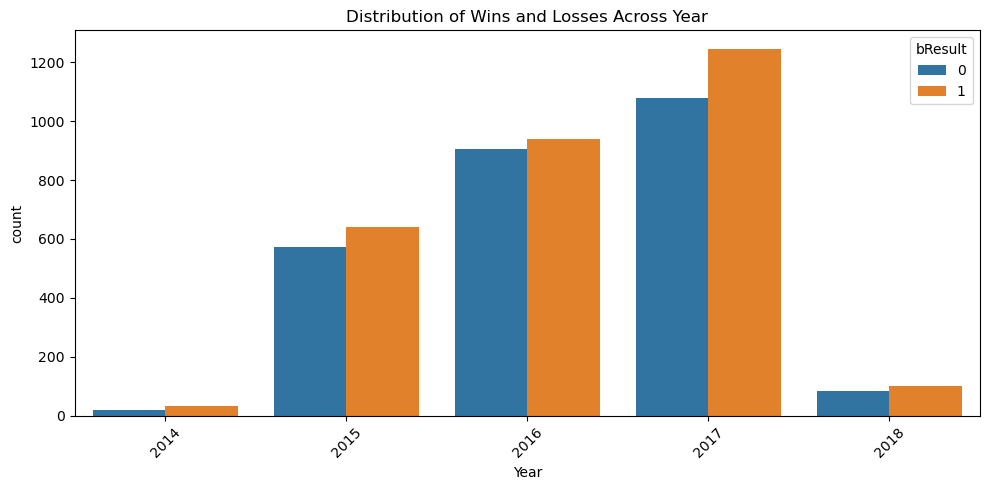

Cross-tabulation for Type:
bResult           0     1
Type                     
International   208   256
Playoffs        273   311
Promotion       154   154
Regional         52    57
Season         1975  2182

Chi-Square Test for Type:
Chi2 Statistic: 2.185489818869129, p-value: 0.701686643525693



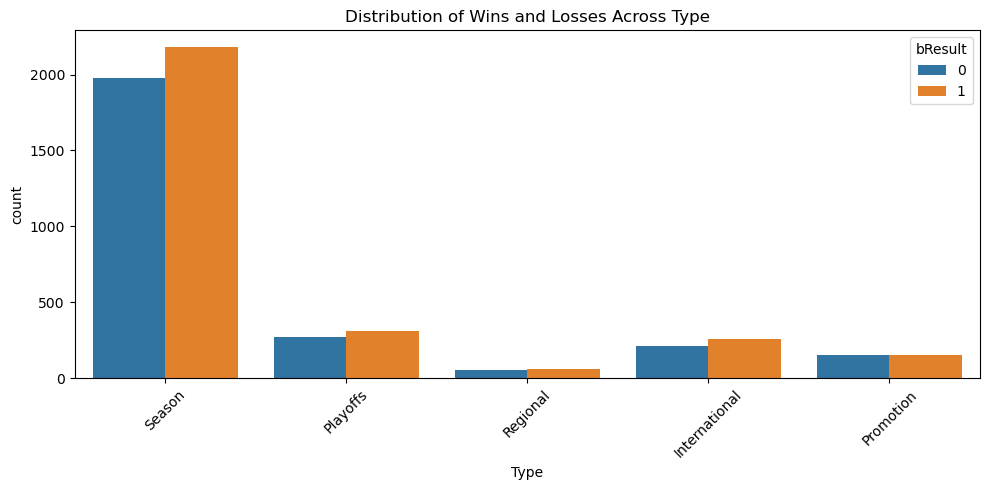

In [12]:
# Function to perform EDA on categorical variables
def analyze_categorical_feature(feature):
    # Cross tabulation between feature and bResult
    contingency_table = pd.crosstab(data[feature], data['bResult'])
    print(f"Cross-tabulation for {feature}:\n{contingency_table}\n")
    
    # Chi-Square Test
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    print(f"Chi-Square Test for {feature}:\nChi2 Statistic: {chi2}, p-value: {p}\n")
    
    # Plotting
    plt.figure(figsize=(10, 5))
    sns.countplot(x=feature, hue='bResult', data=data)
    plt.title(f"Distribution of Wins and Losses Across {feature}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Analyzing each of the four categorical features
analyze_categorical_feature('League')
analyze_categorical_feature('Season')
analyze_categorical_feature('Year')
analyze_categorical_feature('Type')

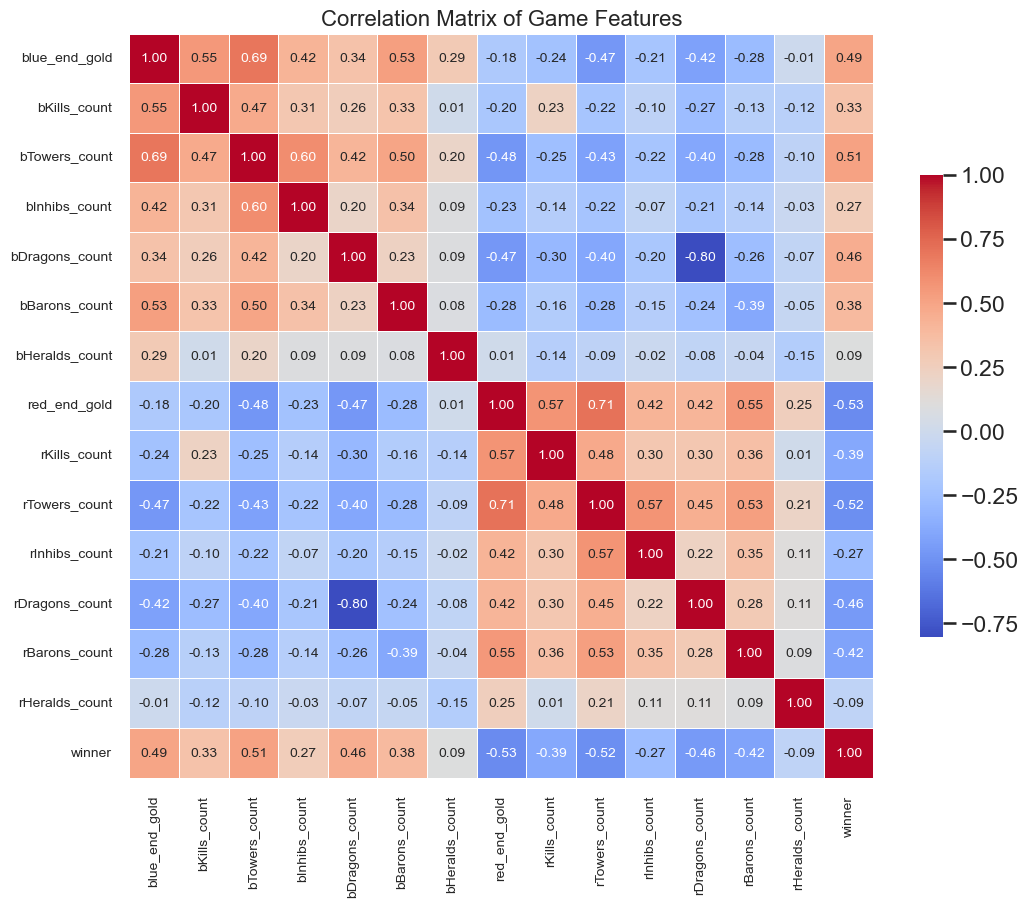

In [13]:
# Setting the larger context and larger font scale
sns.set_context('talk')  
sns.set_style('darkgrid')
plt.figure(figsize=(12, 12))

# Calculate the correlation matrix
correlation_matrix = data[['blue_end_gold','bKills_count', 'bTowers_count', 'bInhibs_count', 'bDragons_count', 
                           'bBarons_count', 'bHeralds_count', 'red_end_gold', 'rKills_count', 'rTowers_count', 
                           'rInhibs_count', 'rDragons_count', 'rBarons_count', 'rHeralds_count', 'winner']].corr()

# Drawing the heatmap with the mask
sns.heatmap(correlation_matrix, annot=True, square=True, cmap='coolwarm', linewidths=.5, cbar_kws={"shrink": .5}, fmt=".2f", annot_kws={"size": 10})

# Adding title and labels as needed
plt.title('Correlation Matrix of Game Features', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

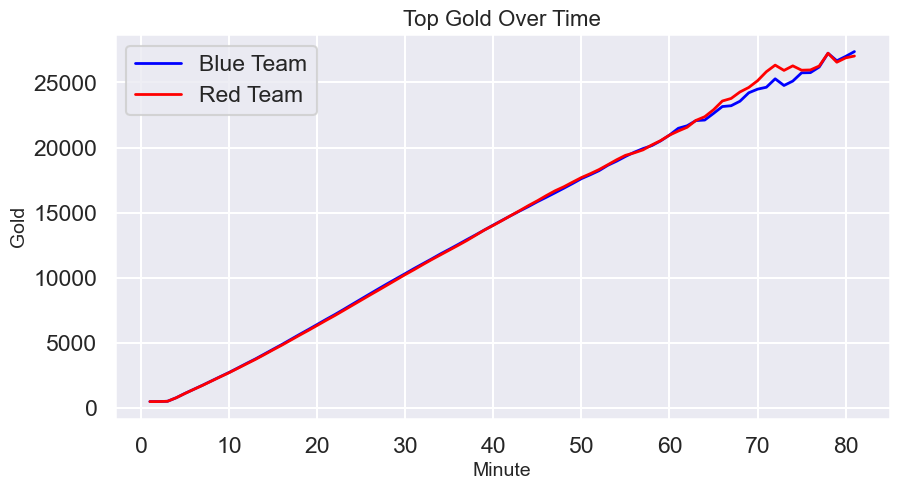

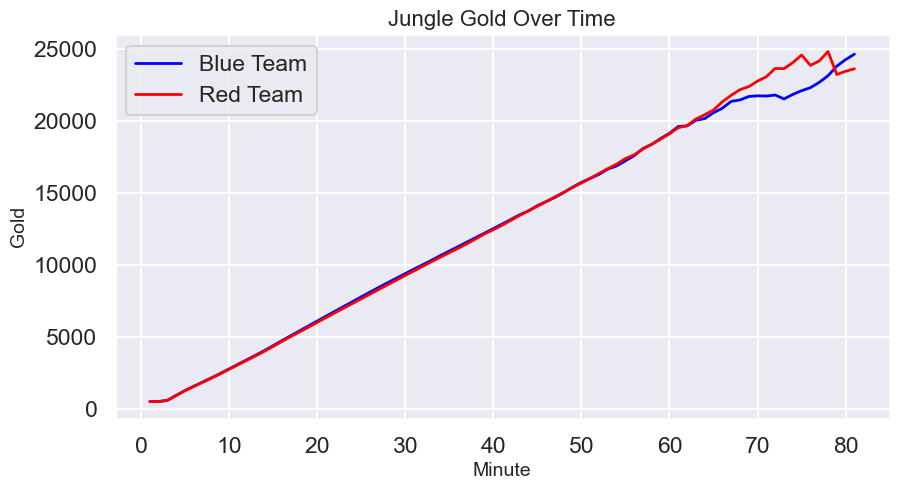

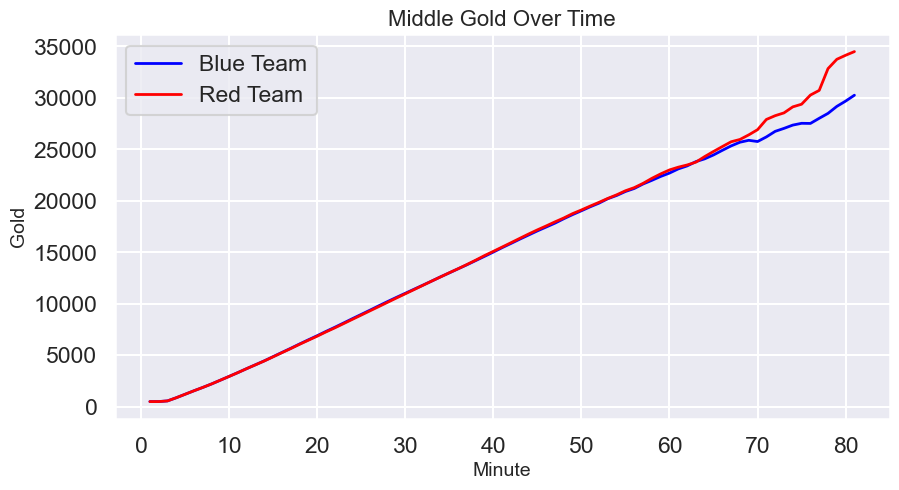

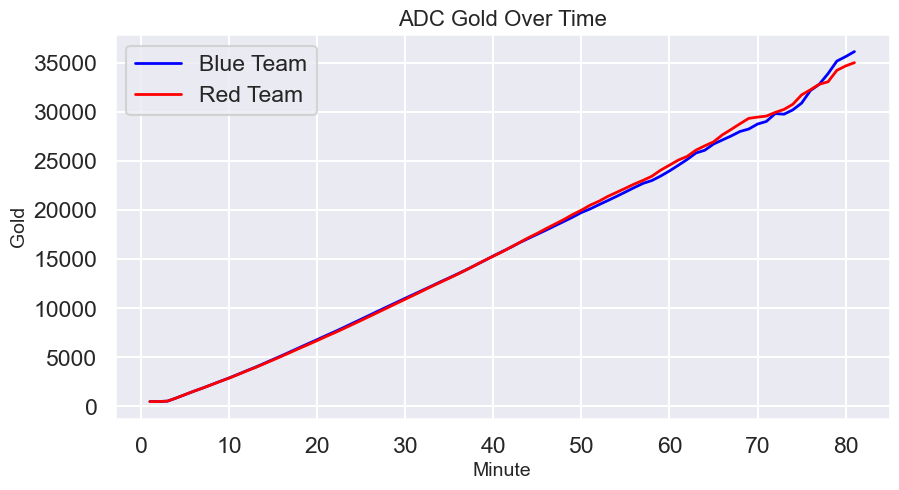

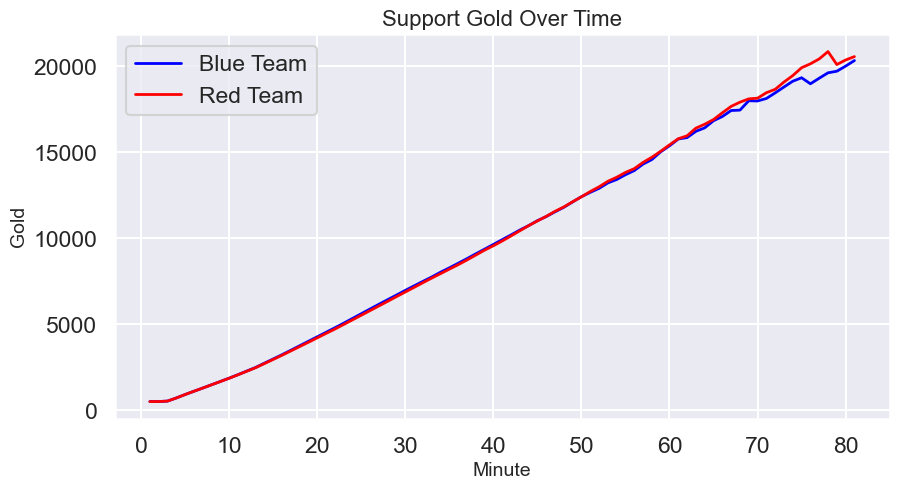

In [14]:
teamGold_Data = pd.read_csv("./gold.csv")

# Creating minute column names for pd.melt()
minutes = ['min_' + str(x + 1) for x in range(81)]
teamGold_Data = pd.melt(teamGold_Data, id_vars=['Address', 'Type'], value_vars=minutes, 
                        var_name='minute', value_name='gold')

# Changing the minute variable into an integer
teamGold_Data.minute = teamGold_Data.minute.str.strip('min_').astype(int)

# Define sections and get the number of sections
sections = ['Top', 'Jungle', 'Middle', 'ADC', 'Support']
num_sections = len(sections)

# Plotting data for each section
for i in range(num_sections):
    plt.figure(figsize=(10, 5))  # Adding figure size to make the plot larger and more readable
    plt.plot(teamGold_Data[teamGold_Data.Type == 'goldblue' + sections[i]].groupby('minute').gold.mean(), 
             label='Blue Team', color='blue', linewidth=2)
    plt.plot(teamGold_Data[teamGold_Data.Type == 'goldred' + sections[i]].groupby('minute').gold.mean(), 
             label='Red Team', color='red', linewidth=2)
    plt.xlabel('Minute', fontsize=14)
    plt.ylabel('Gold', fontsize=14)
    plt.title(f'{sections[i]} Gold Over Time', fontsize=16)
    plt.legend()
    plt.grid(True)
    plt.show()

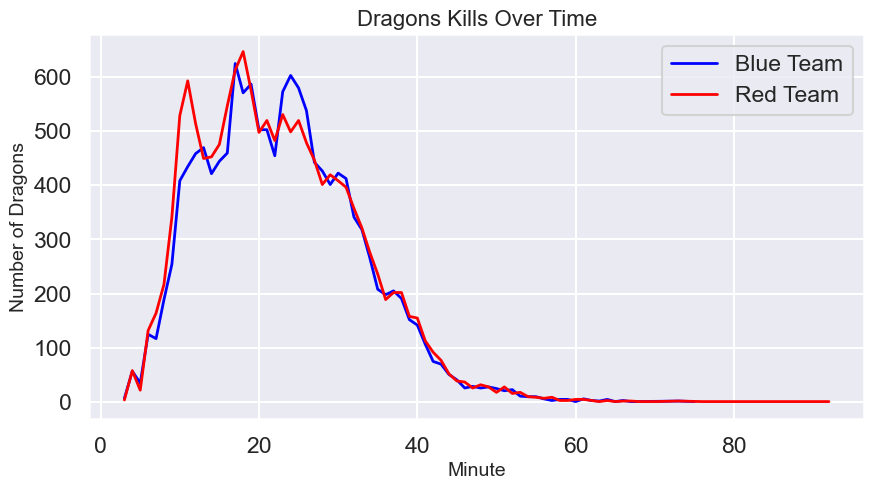

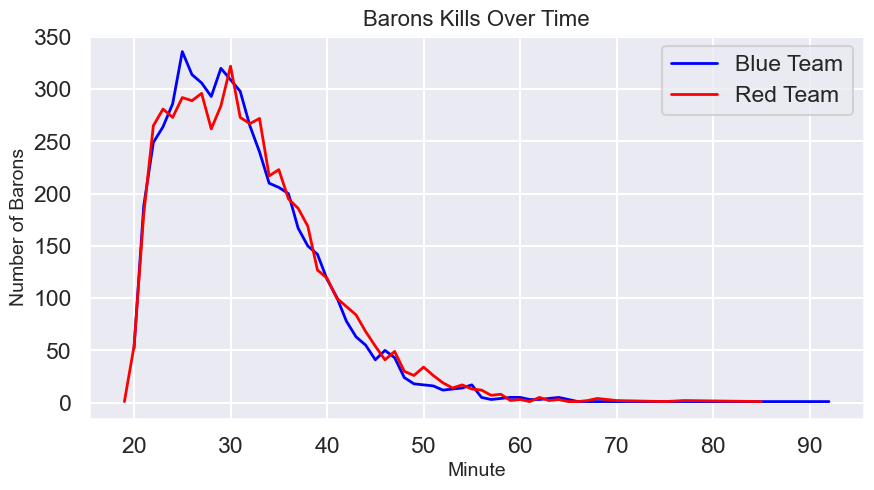

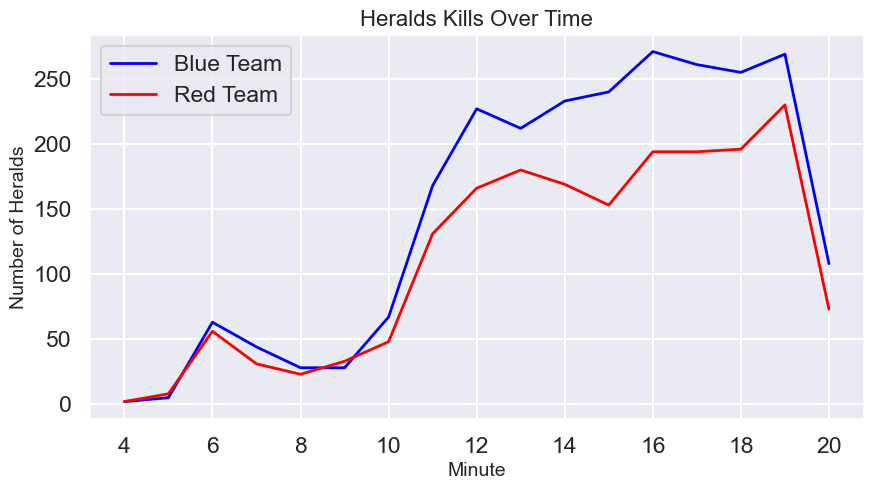

In [15]:
monsters_data = pd.read_csv("./monsters.csv")
monsters_data = monsters_data.round({'Time': 0})

# Define sections for monster types
monster_types = ["Dragons", "Barons", "Heralds"]
num_monster_types = len(monster_types)

# Plotting data for each monster type
for i in range(num_monster_types):
    plt.figure(figsize=(10, 5))
    blue_monsters = monsters_data[monsters_data.Team == 'b' + monster_types[i]].groupby('Time').size()
    red_monsters = monsters_data[monsters_data.Team == 'r' + monster_types[i]].groupby('Time').size()
    plt.plot(blue_monsters.index, blue_monsters, label='Blue Team', color='blue', linewidth=2)
    plt.plot(red_monsters.index, red_monsters, label='Red Team', color='red', linewidth=2)
    plt.xlabel('Minute', fontsize=14)
    plt.ylabel('Number of ' + monster_types[i], fontsize=14)
    plt.title(monster_types[i] + ' Kills Over Time', fontsize=16)
    plt.legend()
    plt.grid(True)
    plt.show()

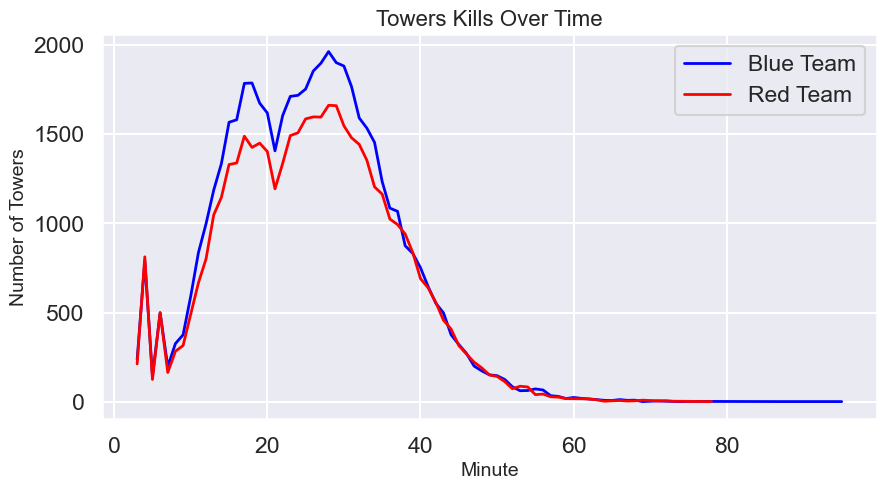

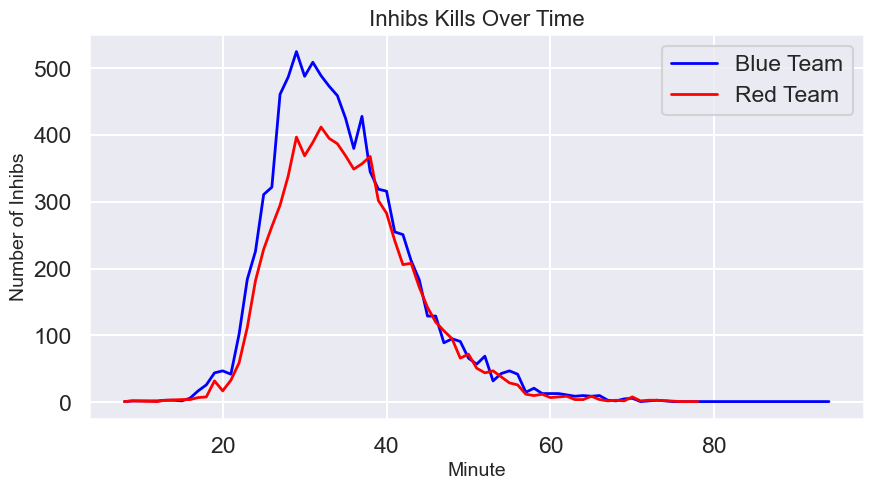

In [16]:
structures_data = pd.read_csv("./structures.csv")
structures_data = structures_data.round({'Time': 0})

# Define sections for structure types
structure_types = ["Towers", "Inhibs"]
num_structure_types = len(structure_types)

# Plotting data for each structure type
for i in range(num_structure_types):
    plt.figure(figsize=(10, 5))
    blue_structures = structures_data[structures_data.Team == 'b' + structure_types[i]].groupby('Time').size()
    red_structures = structures_data[structures_data.Team == 'r' + structure_types[i]].groupby('Time').size()
    plt.plot(blue_structures.index, blue_structures, label='Blue Team', color='blue', linewidth=2)
    plt.plot(red_structures.index, red_structures, label='Red Team', color='red', linewidth=2)
    plt.xlabel('Minute', fontsize=14)
    plt.ylabel('Number of ' + structure_types[i], fontsize=14)
    plt.title(structure_types[i] + ' Kills Over Time', fontsize=16)
    plt.legend()
    plt.grid(True)
    plt.show()

In [17]:
# Define the features (X) and target variable (y)
features = data[['Year','bKills_count', 'bTowers_count', 'bInhibs_count', 'bDragons_count', 'bBarons_count', 'bHeralds_count', 
          'rKills_count', 'rTowers_count', 'rInhibs_count', 'rDragons_count', 'rBarons_count', 'rHeralds_count']]
target = data['winner']

# Forward selection function
def forward_selection(features, target, initial_features=[]):
    selected_features = initial_features
    remaining_features = set(features.columns)
    p_values = {}
    
    while remaining_features:
        best_pval = np.inf
        best_feature = None
        
        for feature in remaining_features:
            model = sm.Logit(target, sm.add_constant(features[selected_features + [feature]])).fit(disp=False)
            pval = model.pvalues[feature]
            p_values[feature] = pval
            
            if pval < best_pval:
                best_pval = pval
                best_feature = feature
        
        if best_pval < 0.05:  # Adjust significance level as needed
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
        else:
            break
            
    return selected_features, p_values

# Perform forward selection
selected_features, p_values = forward_selection(features, target)

# Print selected features and their p-values
print("Selected Features and their P-Values:")
for feature in selected_features:
    print(f"Feature: {feature}, P-Value: {p_values[feature]}")


Selected Features and their P-Values:
Feature: rTowers_count, P-Value: 2.797871683262397e-247
Feature: bTowers_count, P-Value: 4.018898245305303e-142
Feature: bDragons_count, P-Value: 1.575828305616747e-56
Feature: rBarons_count, P-Value: 1.0711833125139547e-34
Feature: rKills_count, P-Value: 1.4131254030847154e-20
Feature: bKills_count, P-Value: 9.749480629512759e-45
Feature: bBarons_count, P-Value: 1.3213805309676213e-09
Feature: rDragons_count, P-Value: 0.0066383529649576


## Checking Multicollinearity

In [18]:
# Prepare the formula for dmatrices
formula = 'winner ~ blue_end_gold + bKills_count + bTowers_count + bInhibs_count + bDragons_count + ' \
          'bBarons_count + bHeralds_count + red_end_gold + rKills_count + rTowers_count + ' \
          'rInhibs_count + rDragons_count + rBarons_count + rHeralds_count'


# Dataset filtering for necessary columns
relevant_columns = ['blue_end_gold','bKills_count', 'bTowers_count', 'bInhibs_count', 'bDragons_count', 
                           'bBarons_count', 'bHeralds_count', 'red_end_gold', 'rKills_count', 'rTowers_count', 
                           'rInhibs_count', 'rDragons_count', 'rBarons_count', 'rHeralds_count', 'winner']

# Create the design matrices for the regression model, using 'winner' as the response variable
response, predictors = dmatrices(formula, data=data[relevant_columns], return_type='dataframe')

# Initialize DataFrame to hold VIF results
vif_data = pd.DataFrame()

try:
    # Calculate VIF for each explanatory variable
    vif_data['VIF'] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]
    vif_data['variable'] = predictors.columns
except Exception as e:
    print(f"Error calculating VIF: {e}")

# Display the VIF for each explanatory variable
vif_data

,VIF,variable
0,555.349716,Intercept
1,5.976842,blue_end_gold
2,2.665811,bKills_count
3,3.981469,bTowers_count
4,1.615000,bInhibs_count
5,3.128605,bDragons_count
6,1.658492,bBarons_count
7,1.210424,bHeralds_count
8,6.382918,red_end_gold
9,2.790484,rKills_count


# Splitting Data

In [19]:
X = data[['bKills_count', 'bTowers_count', 'bInhibs_count', 'bDragons_count','bBarons_count', 'bHeralds_count', 'rKills_count', 'rTowers_count', 'rInhibs_count', 'rDragons_count', 'rBarons_count', 'rHeralds_count']]
y = data['winner']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [20]:
X_train.to_csv('./split_train.csv')

# MODELLING

## Logistic Regression

Confusion Matrix:
 [[864 216]
 [187 982]]
Accuracy Score: 0.8208092485549133
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1080
           1       0.82      0.84      0.83      1169

    accuracy                           0.82      2249
   macro avg       0.82      0.82      0.82      2249
weighted avg       0.82      0.82      0.82      2249



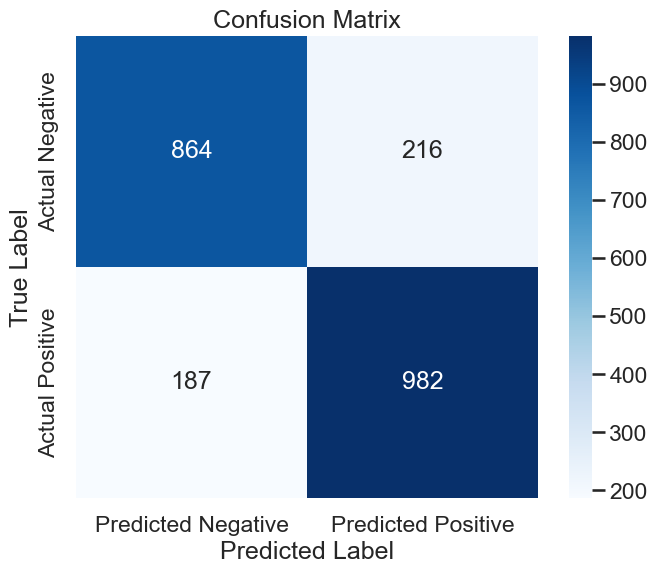

Model Coefficients: ['0.1586', '0.2694', '0.0094', '0.3057', '0.2711', '-0.0315', '-0.1740', '-0.3349', '-0.0280', '-0.1485', '-0.3566', '0.0402']


In [21]:
# Initialize the Logistic Regression model with a higher number of iterations
logmodel = LogisticRegression(max_iter=1000, C=0.01, penalty='l2')

# Fit the model to the training data
try:
    logmodel.fit(X_train, y_train)
except Exception as e:
    print(f"An error occurred during model training: {e}")
    raise

# Generate predictions on the test set
predictions = logmodel.predict(X_test)

# Model Evaluation
conf_matrix = confusion_matrix(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)
class_report = classification_report(y_test, predictions)

# Display the results
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy Score:", accuracy)
print("Classification Report:\n", class_report)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', square=True,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print the coefficients of the model
weights = logmodel.coef_[0]  # Get the first array of coefficients if it's multi-class
formatted_weights = ["{:.4f}".format(weight) for weight in weights]
print("Model Coefficients:", formatted_weights)


In [22]:
# Define the parameter grid: here 'C' is the inverse of regularization strength
# Lower 'C' values increase regularization strength which can help to reduce overfitting but might increase underfitting
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Example values for C
    'penalty': ['l1', 'l2']  # l1 lasso l2 ridge
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=logmodel, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit GridSearchCV
try:
    grid_search.fit(X_train, y_train)
except Exception as e:
    print(f"An error occurred during hyperparameter tuning: {e}")
    raise

# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters found:  {'C': 0.01, 'penalty': 'l2'}


/Users/shubhamshah/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/shubhamshah/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/shubhamshah/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/shubhamshah/anaconda3/lib/python3.11/site-packages/sklearn/

In [23]:
logit_model = sm.Logit(y_train, X_train)
try:
    result = logit_model.fit()
    print(result.summary())
    
    # Prepare coefficients and confidence intervals
    ci = result.conf_int()
    ci.columns = ['lower', 'upper']
    coeffs = pd.DataFrame()
    coeffs['coefficients'] = result.params
    coeffs = coeffs.join(ci)
    
    # Compute odds ratios and corresponding confidence intervals
    coeffs['odds'] = np.exp(coeffs['coefficients'])
    coeffs['odds_lower'] = np.exp(coeffs['lower'])
    coeffs['odds_upper'] = np.exp(coeffs['upper'])
    
    display(coeffs)
except Exception as e:
    print(f"An error occurred while fitting the model: {e}")

Optimization terminated successfully.
         Current function value: 0.396571
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 winner   No. Observations:                 3373
Model:                          Logit   Df Residuals:                     3361
Method:                           MLE   Df Model:                           11
Date:                Sun, 14 Apr 2024   Pseudo R-squ.:                  0.4263
Time:                        00:42:55   Log-Likelihood:                -1337.6
converged:                       True   LL-Null:                       -2331.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
bKills_count       0.1526      0.015      9.850      0.000       0.122       0.183
bTowers_count    

,coefficients,lower,upper,odds,odds_lower,odds_upper
bKills_count,0.152641,0.122270,0.183012,1.164906,1.130059,1.200829
bTowers_count,0.276522,0.203785,0.349260,1.318536,1.226034,1.418018
bInhibs_count,-0.043160,-0.385079,0.298758,0.957758,0.680397,1.348183
bDragons_count,0.417333,0.301680,0.532987,1.517908,1.352129,1.704014
bBarons_count,0.498947,0.254950,0.742945,1.646987,1.290397,2.102116
bHeralds_count,-0.054823,-0.245728,0.136083,0.946653,0.782135,1.145777
rKills_count,-0.164513,-0.193890,-0.135136,0.848307,0.823749,0.873597
rTowers_count,-0.342831,-0.416503,-0.269160,0.709758,0.659348,0.764021
rInhibs_count,0.013495,-0.385467,0.412457,1.013586,0.680133,1.510524
rDragons_count,-0.090872,-0.202993,0.021248,0.913134,0.816284,1.021476


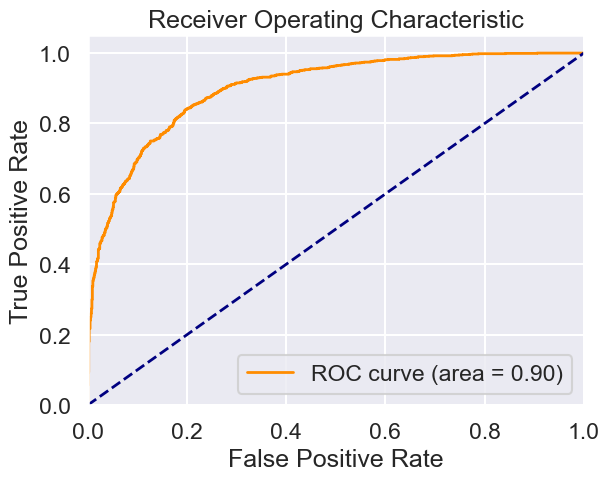

In [24]:
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


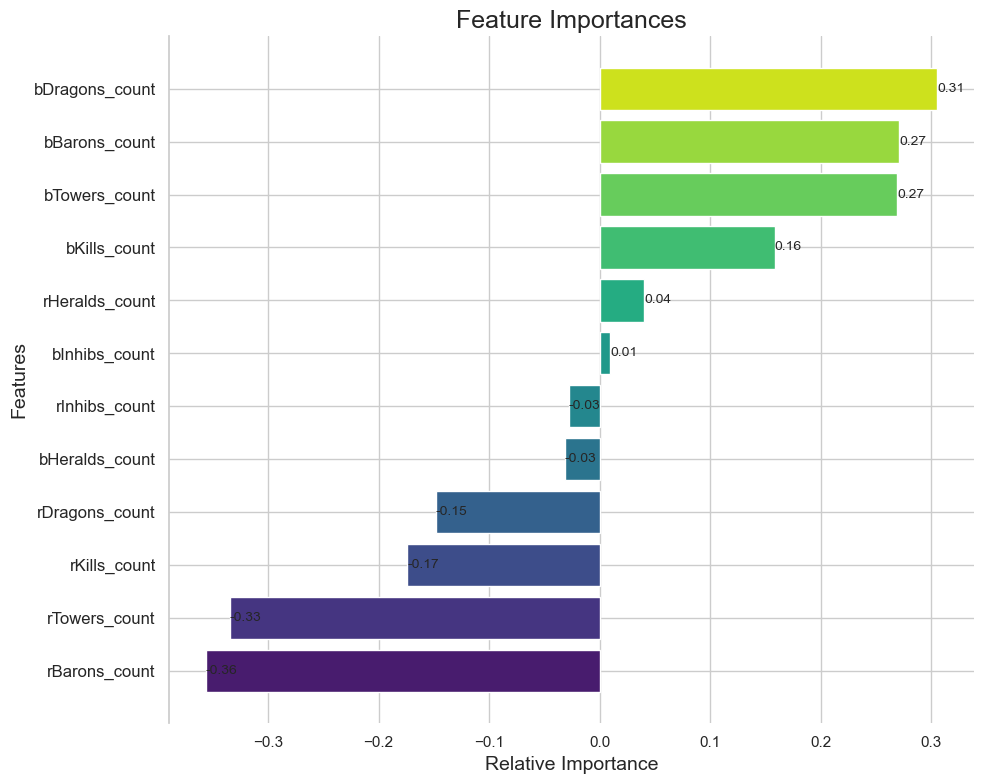

In [25]:
weights = np.array(weights)  # Convert weights to a numpy array if not already
sorted_indices = np.argsort(weights)  # Get indices that would sort the array
sns.set(style="whitegrid")

plt.figure(figsize=(10, 8))
plt.title('Feature Importances', fontsize=18)
plt.xlabel('Relative Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.barh(range(len(sorted_indices)), weights[sorted_indices], color=sns.color_palette("viridis", len(sorted_indices)))
plt.yticks(range(len(sorted_indices)), [X.columns[i] for i in sorted_indices], fontsize=12)

for index, value in enumerate(weights[sorted_indices]):
    plt.text(value, index, f'{value:.2f}', va='center', fontsize=10)

sns.despine(bottom=True)
plt.tight_layout()
plt.show()


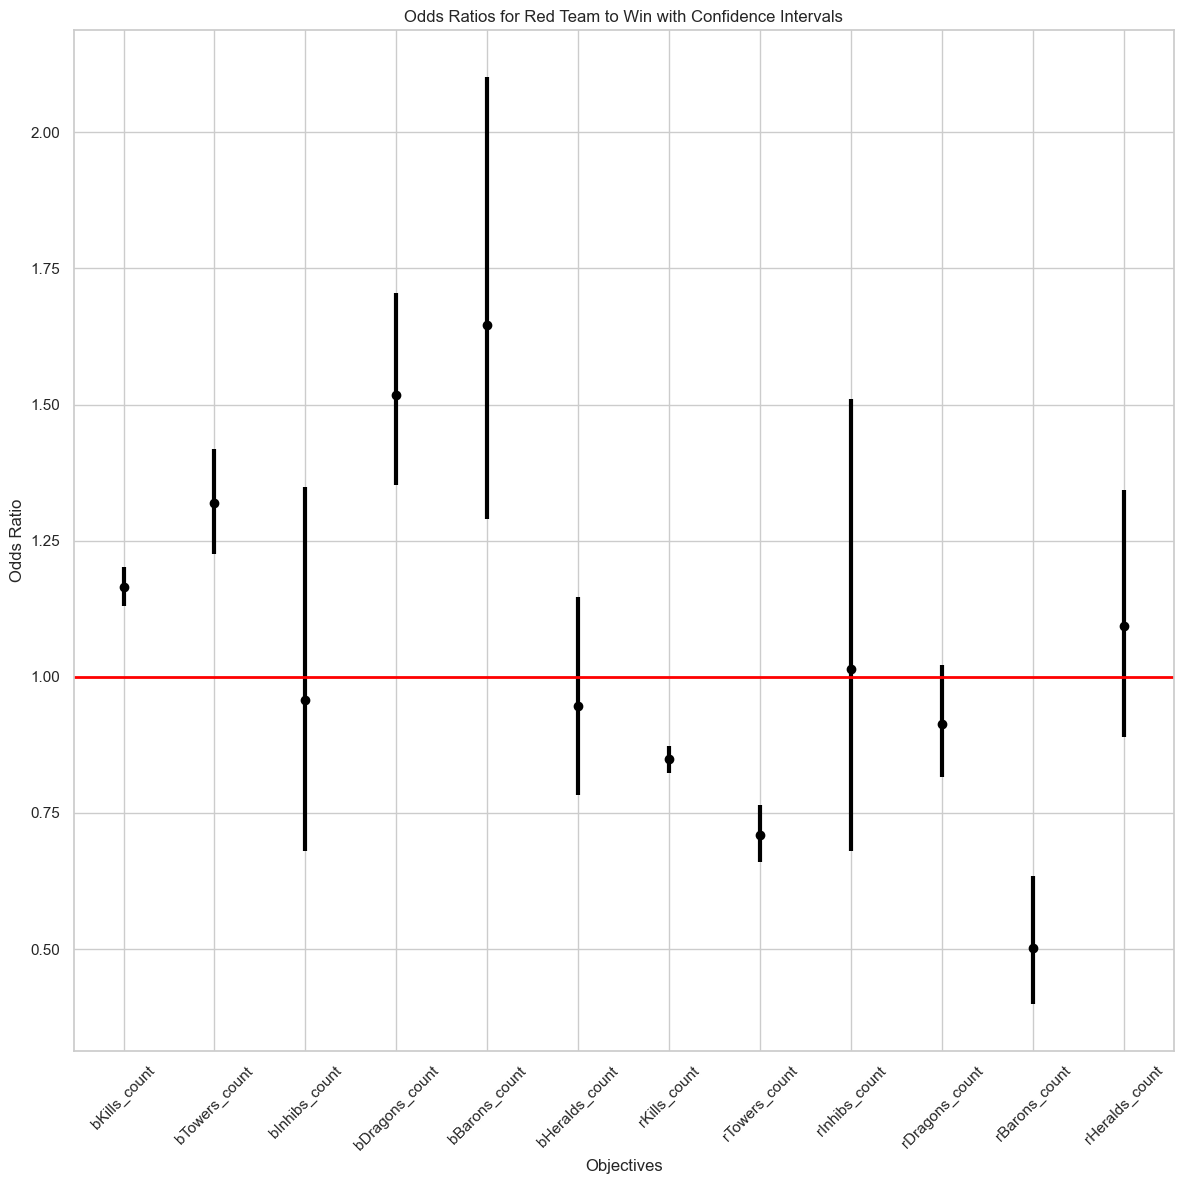

In [26]:
y_line = coeffs['odds']
x = range(len(y_line))  # Automatically generate x-axis positions based on the number of coefficients
lower_errors = y_line - coeffs['odds_lower']
upper_errors = coeffs['odds_upper'] - y_line
error_bars = [lower_errors, upper_errors]

# Create the plot
fig, ax = plt.subplots(figsize=(12, 12))

# Plotting the error bars
ax.errorbar(x, y_line, yerr=error_bars, fmt='o', color='black', ecolor='black', elinewidth=3, capsize=0)

# Draw a horizontal line at y=1 for reference
ax.axhline(y=1, color='red', linestyle='-', linewidth=2)

# Set x-ticks to correspond to objectives and rotate for better readability
ax.set_xticks(x)
ax.set_xticklabels(coeffs.index, rotation=45)

# Set the labels and title
ax.set_ylabel("Odds Ratio")
ax.set_xlabel("Objectives")
ax.set_title("Odds Ratios for Red Team to Win with Confidence Intervals")

# Show the plot
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlap
plt.show()

## Polynomial Regression Model

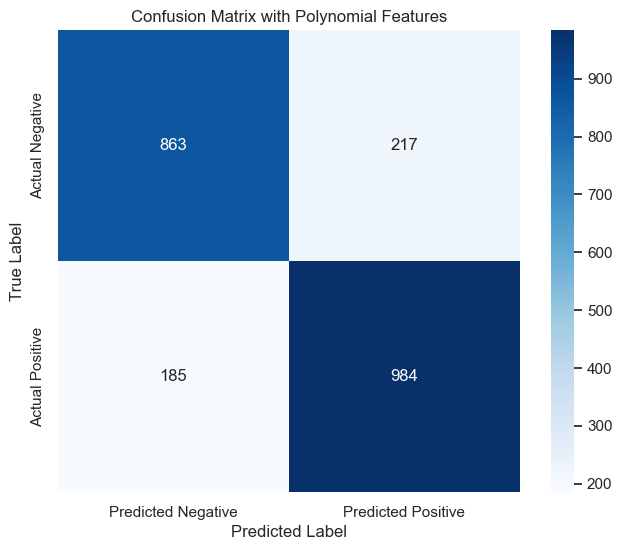

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1080
           1       0.82      0.84      0.83      1169

    accuracy                           0.82      2249
   macro avg       0.82      0.82      0.82      2249
weighted avg       0.82      0.82      0.82      2249

Accuracy Score: 0.8212538906180524


In [27]:
# Initialize and fit PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit the logistic regression model on the transformed data
logmodel_1 = LogisticRegression(max_iter=1000, C=0.01, penalty='l2')
logmodel_1.fit(X_train_poly, y_train)
predictions = logmodel_1.predict(X_test_poly)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', square=True,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix with Polynomial Features')
plt.show()

# Optional: Print classification report and accuracy
class_report = classification_report(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)
print("Classification Report:\n", class_report)
print("Accuracy Score:", accuracy)

## Random Forest Classifier

Confusion Matrix:
 [[849 231]
 [209 960]]
Accuracy Score: 0.8043574922187638
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.79      1080
           1       0.81      0.82      0.81      1169

    accuracy                           0.80      2249
   macro avg       0.80      0.80      0.80      2249
weighted avg       0.80      0.80      0.80      2249



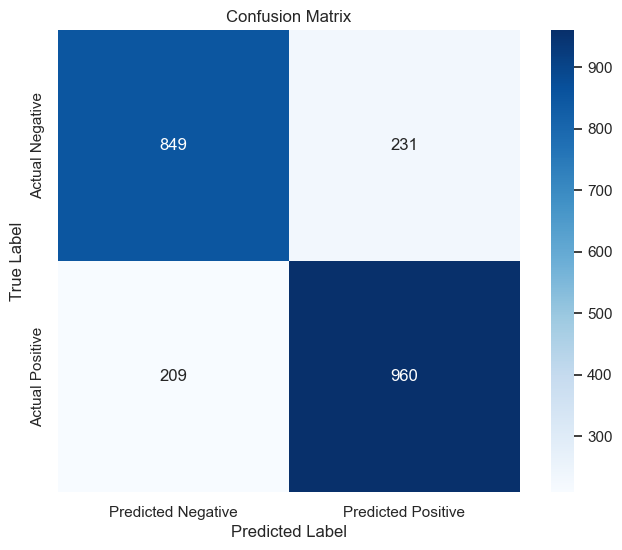

Feature Importance: [0.15060219 0.16713021 0.01165797 0.08388247 0.04109883 0.02904013
 0.1539138  0.16673832 0.01350445 0.09284361 0.06309885 0.02648916]


In [28]:
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
try:
    rf_model.fit(X_train, y_train)
except Exception as e:
    print(f"An error occurred during model training: {e}")
    raise

# Generate predictions on the test set
predictions_rf = rf_model.predict(X_test)

# Model Evaluation
conf_matrix_rf = confusion_matrix(y_test, predictions_rf)
accuracy_rf = accuracy_score(y_test, predictions_rf)
class_report_rf = classification_report(y_test, predictions_rf)

# Display the results
print("Confusion Matrix:\n", conf_matrix_rf)
print("Accuracy Score:", accuracy_rf)
print("Classification Report:\n", class_report_rf)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', square=True,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print feature importance
feature_importance = rf_model.feature_importances_
print("Feature Importance:", feature_importance)

## Ensemble Learning. -  Stacking on Logistic Regression and Random Forest Classifier

In [29]:
# Initialize base estimators
base_estimators = [
    ('logistic', LogisticRegression(max_iter=1000)),  # Logistic Regression
    ('random_forest', RandomForestClassifier(n_estimators=100))  # Random Forest
]

# Initialize stacking model with Logistic Regression as the final estimator
stacking_model = StackingClassifier(estimators=base_estimators, final_estimator=LogisticRegression())

# Train and evaluate stacking model
stacking_model.fit(X_train, y_train)
predictions_stacking = stacking_model.predict(X_test)
accuracy_stacking = accuracy_score(y_test, predictions_stacking)
print("Stacking Model Accuracy:", accuracy_stacking)


Stacking Model Accuracy: 0.8239217429968875


# Evaluating Predictions on Random Test Cases

In [30]:
case_indices = [777, 888]  # Replace with the actual indices you are interested in
X_case = X.loc[case_indices]
y_case = y.loc[case_indices]

# Make predictions for the selected cases
pred = logmodel.predict(X_case)

# Get the predicted probabilities for the selected cases
proba = logmodel.predict_proba(X_case)

# Print the results for each case
for i, index in enumerate(case_indices):
    win = pred[i]
    team = 'Red' if pred[i] == 0 else 'Blue'
    win_prob = round(proba[i][win] * 100, 2)  # Adjust the index based on your class labels
    print(f"Match {index} - Predicted Winner: Team {team} with a probability of {win_prob}%")

    # If you want to print out the probabilities for both teams:
    print(f"Match {index} - Team 1 (Blue) win probability: {round(proba[i][1] * 100, 2)}%")
    print(f"Match {index} - Team 2 (Red) win probability: {round(proba[i][0] * 100, 2)}%")
    print(f"Match {index} - Actual Value: {y[index]}\n")

Match 777 - Predicted Winner: Team Blue with a probability of 79.81%
Match 777 - Team 1 (Blue) win probability: 79.81%
Match 777 - Team 2 (Red) win probability: 20.19%
Match 777 - Actual Value: 1

Match 888 - Predicted Winner: Team Red with a probability of 84.59%
Match 888 - Team 1 (Blue) win probability: 15.41%
Match 888 - Team 2 (Red) win probability: 84.59%
Match 888 - Actual Value: 1



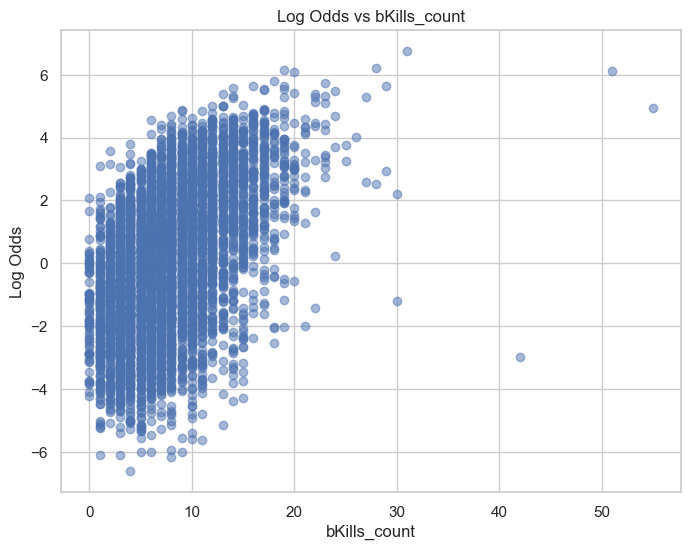

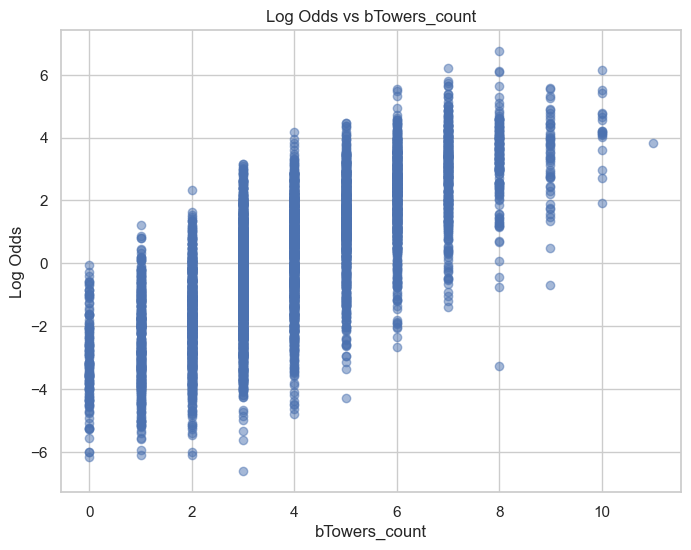

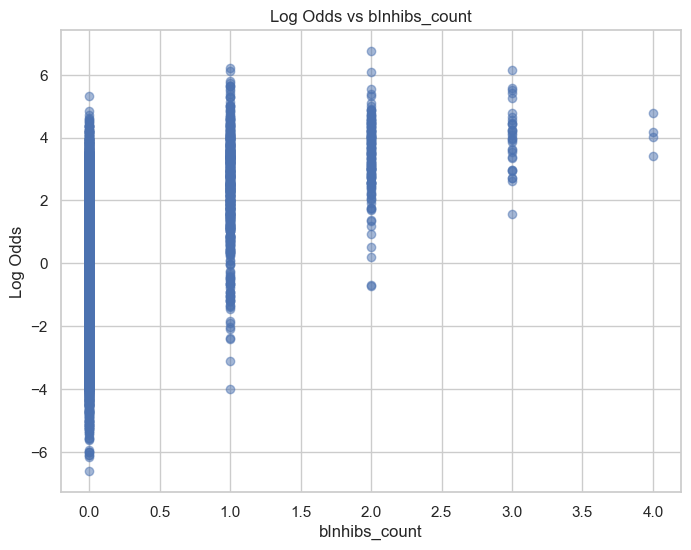

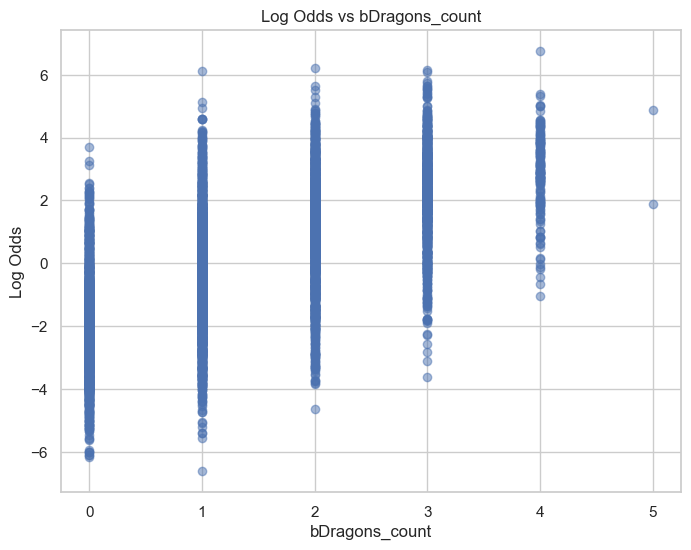

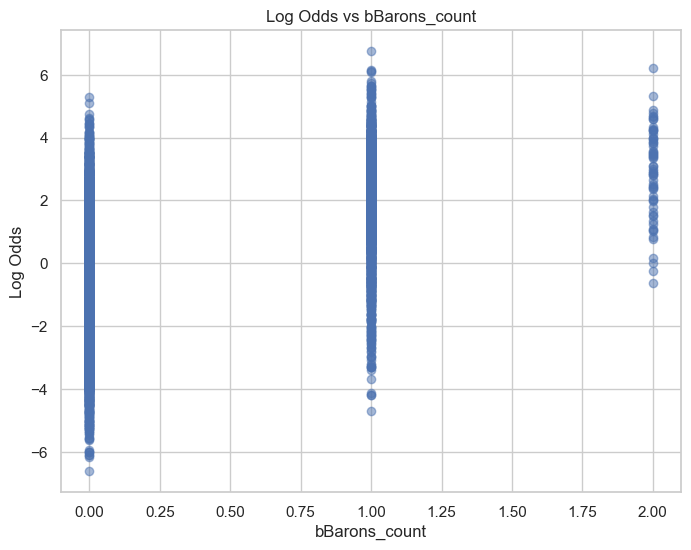

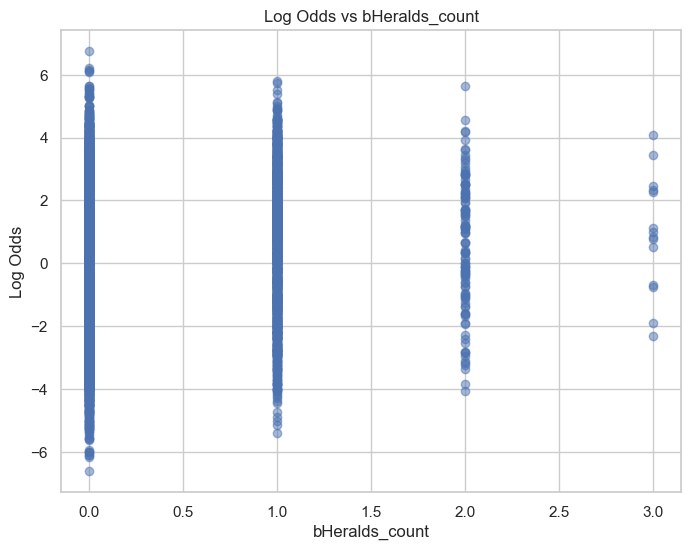

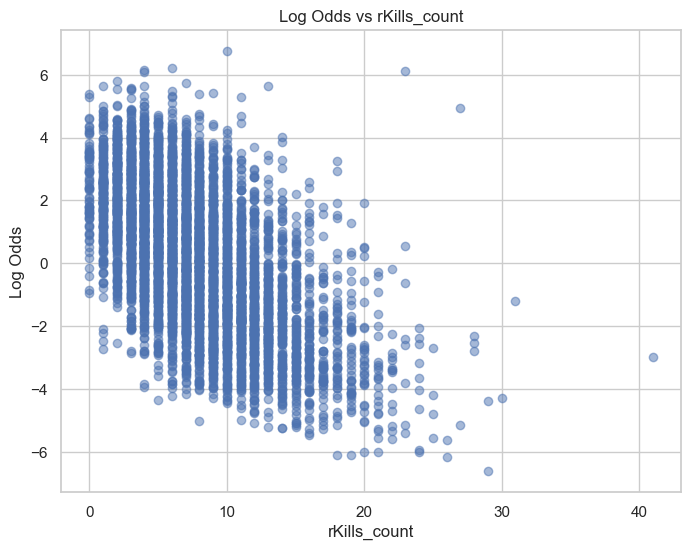

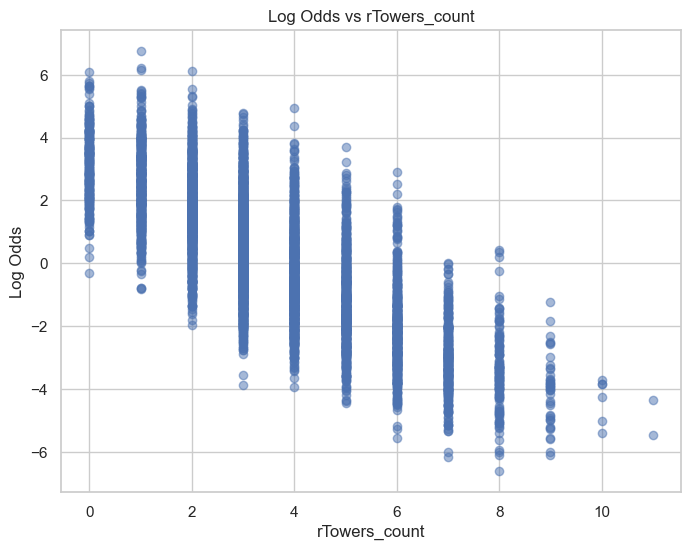

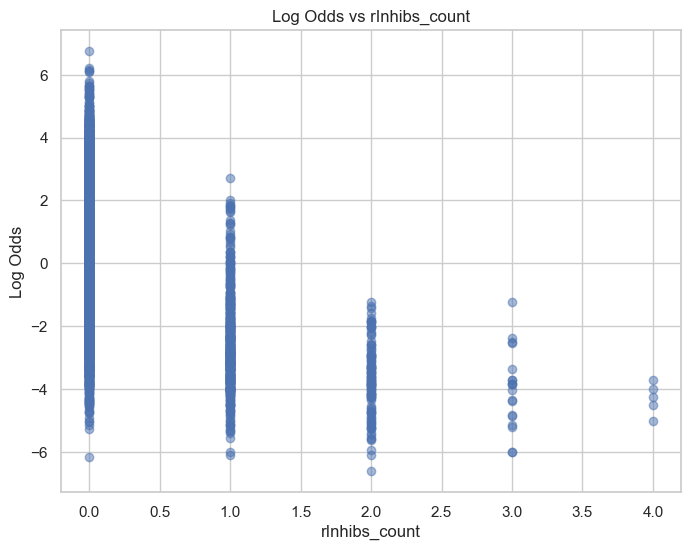

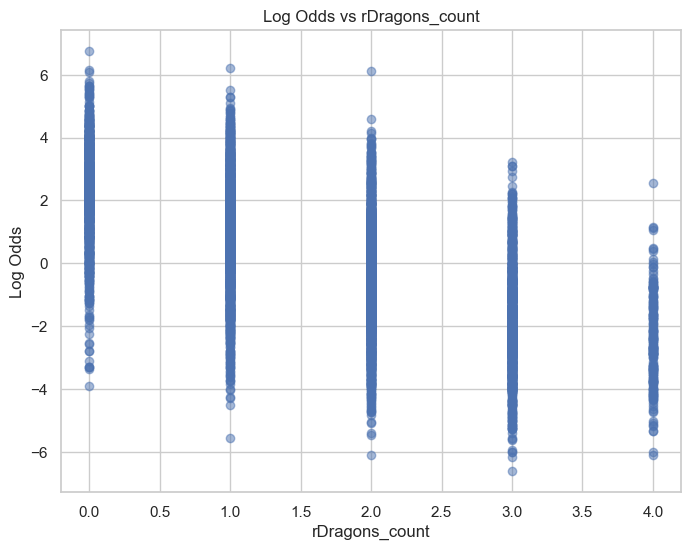

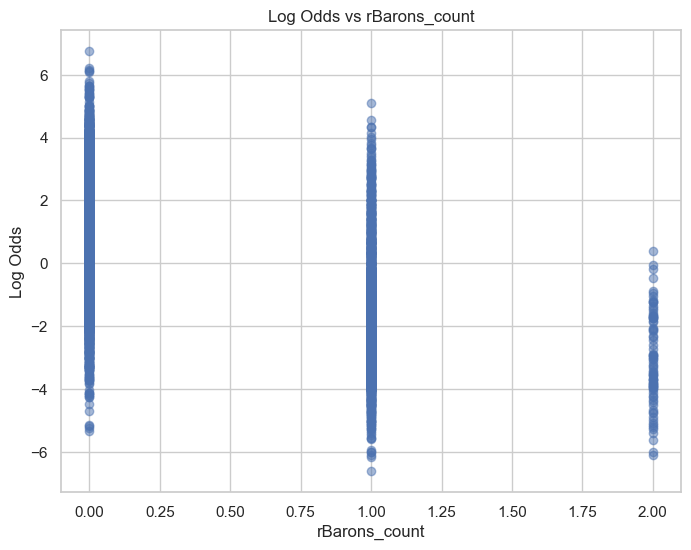

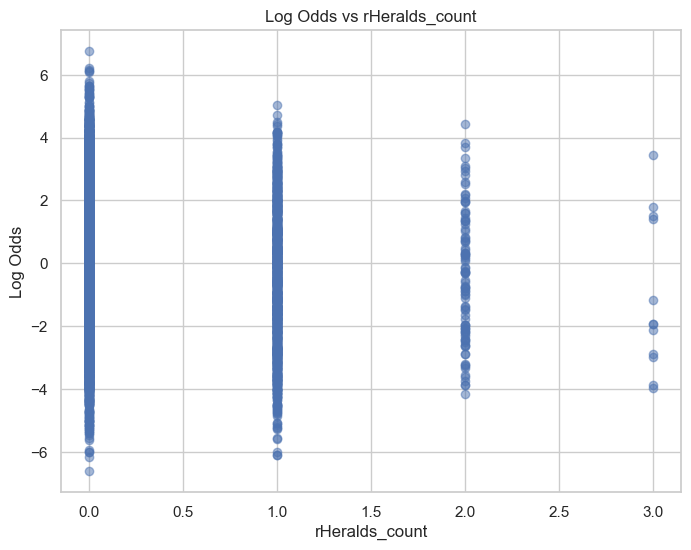

In [32]:
# Get the predicted probabilities
pred_probs = logmodel.predict_proba(X)[:, 1]  # Probability of winning

# Calculate log odds
log_odds = np.log(pred_probs / (1 - pred_probs))

# Plot each feature against log odds
for feature in X.columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(X[feature], log_odds, alpha=0.5)
    plt.title(f'Log Odds vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Log Odds')
    plt.grid(True)
    plt.show()


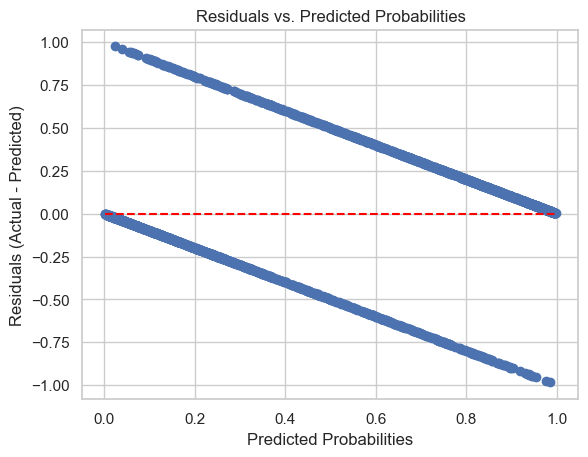

In [34]:
# Generate predicted probabilities
predicted_probabilities = logmodel.predict_proba(X_test)[:, 1]  # Get the probability of the positive class

# Compute 'residuals'
residuals = y_test - predicted_probabilities

# Plot the residuals
plt.scatter(predicted_probabilities, residuals)
plt.hlines(0, np.min(predicted_probabilities), np.max(predicted_probabilities), colors='red', linestyles='--')
plt.xlabel('Predicted Probabilities')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals vs. Predicted Probabilities')
plt.show()